## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks. We use random forest to solve data sensitiveness issue of decision tree. It operates by constructing multiple decision trees with multiple bootstraped datat at training time. To classify a new object based on attributes, each tree gives a classification and we say choose the class having the highest tree “votes”. While for the regression we take the average of all prediciton done by those trees.

### How Random Forest works?
Random forest first bootstrap the training data with replacement(dataset with duplicates) and generate multiple new dataset from our original dataset by randomly picking any rows and few columns (squareroot or log of the total number of column is belived to be good number of choice) for each new generated dataset from the original data. From this multiple newly generated dataset, random forest creates multilpe decision tree (that's the reason it is called forest) and finally it completes our random forest model. And now when we want to classify or predict something we pass the testcase to all decision tree and collect their output, we take the mode or mean depending on the use classification or regression and present it as our final output. This process of combining result from multiple model is called `aggregation` and bootstrapping and aggregation together called `Bagging`.
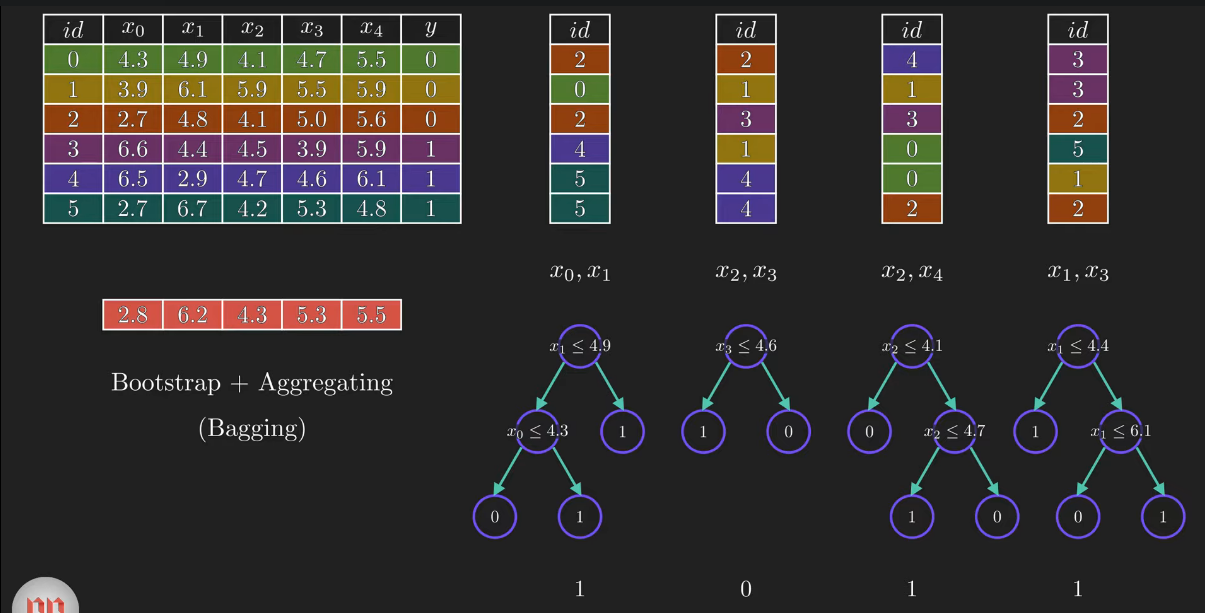 <br>

### Few Question
* We do bootstraping do reduce the data sensitiveness issue and overfitting of decision tree.
* We do random feature selection so that each decison tree in random forest have less correlation. If we use every features in all decision tree than all decision tree will same decision nodes and will act very similary which will aslo increase the model variance.
* Random Forest is called random because we do two random forest, first we do `bootstrapping`(select random row from the data and create new dataset) and second we choose the random features for each dataset.

## Building Random Forest Model

In [19]:
# importing required libraries
import pandas as pd # <---- for handling tabular data
from sklearn.datasets import load_breast_cancer # <-- dataset we will be working on
from sklearn.ensemble import RandomForestClassifier # <--- for building Decision Tree classifier model
from sklearn.model_selection import train_test_split # <--- for splitting dataset 
from sklearn.metrics import confusion_matrix # <--- for evaluation

In [24]:
data = load_breast_cancer()

# creating data frame 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['type'] = data.target

In [25]:
df.sample(10, random_state=54)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.012380,0.1573,0.05520,...,26.10,98.91,739.1,0.10500,0.07622,0.1060,0.05185,0.2335,0.06263,1
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.037000,0.1959,0.05955,...,15.64,86.97,549.1,0.13850,0.12660,0.1242,0.09391,0.2827,0.06771,1
517,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.094310,0.1802,0.06188,...,25.23,160.50,1646.0,0.14170,0.33090,0.4185,0.16130,0.2549,0.09136,0
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.065760,0.1893,0.05534,...,26.30,130.70,1260.0,0.11680,0.21190,0.2318,0.14740,0.2810,0.07228,0
258,15.66,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.137700,0.2495,0.08104,...,31.64,143.70,1226.0,0.15040,0.51720,0.6181,0.24620,0.3277,0.10190,0
231,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,...,33.75,79.82,452.3,0.09203,0.14320,0.1089,0.02083,0.2849,0.07087,1
189,12.30,15.90,78.83,463.7,0.08080,0.07253,0.03844,0.016540,0.1667,0.05474,...,19.59,86.65,546.7,0.10960,0.16500,0.1423,0.04815,0.2482,0.06306,1
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.014280,0.2031,0.06267,...,26.98,86.43,520.5,0.12490,0.19370,0.2560,0.06664,0.3035,0.08284,1
304,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.015020,0.1411,0.06243,...,21.61,82.69,489.8,0.11440,0.17890,0.1226,0.05509,0.2208,0.07638,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [84]:
# data seperation
features = df.iloc[:,: -1]
label = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=73)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [85]:
# let's create our model
model = RandomForestClassifier(random_state=55)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=55)

In [86]:
y_pred = model.predict(x_test)

In [88]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.9824561403508771


In [87]:
# let's see classification report 
confusion_matrix(y_test, y_pred)

array([[45,  1],
       [ 1, 67]], dtype=int64)

So we have got two missclassfied value for both classes while rest are perfect